En este caso vamos a crear un programa que lea los textos de una base de datos de libros y nos entregue una lista con un conteo de palabras y las veces que se repiten en el texto (palabras unicas)

Usamos un diccionario para que no se repitan. Usamos un for con split para separar las palabras con los espacios pero tambien debemos considerar que hay palabras en mayusculas luego de puntos (las ponemos todas en minuscula) y que hay otros simbolos de puntuacion que no deben incluirse como palabras nuevas (skips)

In [9]:
def count_words(text):
    """Count the number of times each word occurs in text (str). Return dictionary where
    the keys are unique words and values are word counts. Skip punctuation."""
    text = text.lower()
    skips = [".",",",";",":","'",'"']
    
    for ch in skips:
       text=text.replace(ch,"")
    
    word_counts = {}
    for word in text.split(" "):
        # known word
        if word in word_counts:
            word_counts[word] += 1 
        else:
            word_counts[word] = 1
    
    return word_counts

In [10]:
text = "This is my test text. We're keeping this text short to keep things manageable."
count_words(text)

{'this': 2,
 'is': 1,
 'my': 1,
 'test': 1,
 'text': 2,
 'were': 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable': 1}

Python nos da la opcion de usar un contador para que haga la tarea mas eficiente. Vamos a usarlo

In [13]:
from collections import Counter

def count_words_fast(text):
    """Count the number of times each word occurs in text (str). Return dictionary where
    the keys are unique words and values are word counts. Skip punctuation."""
    text = text.lower()
    skips = [".",",",";",":","'",'"']
    
    for ch in skips:
       text=text.replace(ch,"")
    
    word_counts= Counter(text.split(" "))
    
    return word_counts

count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'my': 1,
         'test': 1,
         'text': 2,
         'were': 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageable': 1})

In [15]:
count_words_fast(text) == count_words(text) #Los resultados son identicos

True

In [16]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [17]:
count_words(text) is count_words_fast(text)

False

Ahora aprendamos a leer libros 

In [20]:
def read_book(title_path):
    """Read a book and return it as a string"""
    with open(title_path,"r",encoding="utf8") as current_file: #Tipo de encoding mas usado en la web. Ojo con sintaxis
        text= current_file.read()
        text= text.replace("\n","").replace("\r","") #Hacemos dos reemplazos en la misma linea
    return text

In [21]:
text= read_book("./Books/English/shakespeare/Romeo and Juliet.txt")

In [22]:
len(text)

169275

In [23]:
#Intentemos encontrar una linea famosa de romeo y julieta
ind=text.find("What's in a name?")

In [24]:
ind

42757

In [25]:
sample_text = text[ind: ind+1000]

In [26]:
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [27]:
def word_stats(word_counts):
    """Return number of unique words and word frequencies"""
    num_unique= len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)


In [28]:
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
word_counts= count_words(text)
(num_unique,counts) = word_stats(word_counts)
num_unique #Cuantas palabras unicas tenemos

5118

In [29]:
sum(counts) #La suma de las veces que aparecen

40776

Ser capaz de navegar por directorios es muy importante. El metodo aqui sera leer cada libro de nuestra carpeta de directorios. Para hacer eso, leer directorios, tenemos que importar el modulo os. De esta forma python esta leyendo 102 libros y contando las palabras rapidamente. El beneficio de incluir una funcion print en el loop es que podemos seguir la lectura de python

In [34]:
import os
book_dir = "./Books"

In [35]:
os.listdir(book_dir)

['English', 'French', 'Portuguese', 'German']

In [43]:
for language in os.listdir(book_dir): #Este loop busca los lenguajes
    for author in os.listdir(book_dir + "/" + language): # Este book buscara los autores
        for title in os.listdir(book_dir + "/" + language + "/" + author): #Este loop busca los titulos de cada autor
            inputfile= book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text= read_book(inputfile)
            (num_unique, counts)= word_stats(count_words(text))
            
              


./Books/English/shakespeare/Macbeth.txt
./Books/English/shakespeare/Hamlet.txt
./Books/English/shakespeare/Othello.txt
./Books/English/shakespeare/Romeo and Juliet.txt
./Books/English/shakespeare/A Midsummer Night's Dream.txt
./Books/English/shakespeare/The Merchant of Venice.txt
./Books/English/shakespeare/Richard III.txt
./Books/French/de Maupassant/La petite roque.txt
./Books/French/de Maupassant/La Main Gauche.txt
./Books/French/de Maupassant/Claire de Lune.txt
./Books/French/de Maupassant/L'inutile beautCÌ§.txt
./Books/French/de Maupassant/Åuvres compleÌtes de Guy de Maupassant.txt
./Books/French/de Maupassant/La Maison Tellier.txt
./Books/French/de Maupassant/Le Horla.txt
./Books/French/de Maupassant/Boule de Suif.txt
./Books/French/de Maupassant/Contes de la Becasse.txt
./Books/French/sand/Le poaÌme de Myrza.txt
./Books/French/sand/cora.txt
./Books/French/sand/Oeuvres illustrCÌ§es de George Sand.txt
./Books/French/sand/Metella.txt
./Books/French/sand/L' Orco.txt
./Books/Frenc

Pandas es una liberria que nos da herramientas adicionales y estructuradas de datos y funcionalidades de data analysis. Es muy util para manipular numerical tables and time series data. Tiene su nombre de panel data que se refiere a multi-dimensional structured data sets. 

Usaremos pandas para mejorar nuestro codigo

In [45]:
import pandas as pd

#Dataframe. Crear una table
table = pd.DataFrame(columns = ("name", "age"))
table.loc[1] = "James", 22
table.loc[2] = "Jess", 32
table

,name,age
1,James,22
2,Jess,32


In [48]:
import os
book_dir = "./Books"

import pandas as pd
stats= pd.DataFrame(columns= ("language", "author", "title", "length", "unique")) #Hacemos la estructura de nuestro DF

title_num = 1
for language in os.listdir(book_dir): #Este loop busca los lenguajes
    for author in os.listdir(book_dir + "/" + language): # Este book buscara los autores
        for title in os.listdir(book_dir + "/" + language + "/" + author): #Este loop busca los titulos de cada autor
            inputfile= book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text= read_book(inputfile)
            (num_unique, counts)= word_stats(count_words(text))
            stats.loc[title_num] = language, author, title, sum(counts), num_unique #Lo incluimos a la tabla
            title_num += 1 #Sumamos al contador

./Books/English/shakespeare/Macbeth.txt
./Books/English/shakespeare/Hamlet.txt
./Books/English/shakespeare/Othello.txt
./Books/English/shakespeare/Romeo and Juliet.txt
./Books/English/shakespeare/A Midsummer Night's Dream.txt
./Books/English/shakespeare/The Merchant of Venice.txt
./Books/English/shakespeare/Richard III.txt
./Books/French/de Maupassant/La petite roque.txt
./Books/French/de Maupassant/La Main Gauche.txt
./Books/French/de Maupassant/Claire de Lune.txt
./Books/French/de Maupassant/L'inutile beautCÌ§.txt
./Books/French/de Maupassant/Åuvres compleÌtes de Guy de Maupassant.txt
./Books/French/de Maupassant/La Maison Tellier.txt
./Books/French/de Maupassant/Le Horla.txt
./Books/French/de Maupassant/Boule de Suif.txt
./Books/French/de Maupassant/Contes de la Becasse.txt
./Books/French/sand/Le poaÌme de Myrza.txt
./Books/French/sand/cora.txt
./Books/French/sand/Oeuvres illustrCÌ§es de George Sand.txt
./Books/French/sand/Metella.txt
./Books/French/sand/L' Orco.txt
./Books/Frenc

In [49]:
stats

,language,author,title,length,unique
1,English,shakespeare,Macbeth.txt,16874,4780
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Othello.txt,26590,5898
4,English,shakespeare,Romeo and Juliet.txt,40776,5118
5,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
6,English,shakespeare,The Merchant of Venice.txt,20949,4978
7,English,shakespeare,Richard III.txt,48315,5449
8,French,de Maupassant,La petite roque.txt,40688,10890
9,French,de Maupassant,La Main Gauche.txt,33481,9983
10,French,de Maupassant,Claire de Lune.txt,25975,8076


In [50]:
stats.head()

,language,author,title,length,unique
1,English,shakespeare,Macbeth.txt,16874,4780
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Othello.txt,26590,5898
4,English,shakespeare,Romeo and Juliet.txt,40776,5118
5,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345


In [51]:
stats.tail()

,language,author,title,length,unique
98,German,schiller,"Der Parasit, oder die Kunst, sein GlAÌck zu m...",20450,6159
99,German,schiller,Wallensteins Tod.txt,50725,8649
100,German,schiller,die braut von messina.txt,26482,6655
101,German,schiller,Die Jungfrau von Orleans.txt,24181,8806
102,German,schiller,Der Neffe als Onkel.txt,14349,4416


In [52]:
import os
book_dir = "./Books"

import pandas as pd
stats= pd.DataFrame(columns= ("language", "author", "title", "length", "unique")) #Hacemos la estructura de nuestro DF

title_num = 1
for language in os.listdir(book_dir): #Este loop busca los lenguajes
    for author in os.listdir(book_dir + "/" + language): # Este book buscara los autores
        for title in os.listdir(book_dir + "/" + language + "/" + author): #Este loop busca los titulos de cada autor
            inputfile= book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text= read_book(inputfile)
            (num_unique, counts)= word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique #Lo incluimos a la tabla
            title_num += 1 #Sumamos al contador

./Books/English/shakespeare/Macbeth.txt
./Books/English/shakespeare/Hamlet.txt
./Books/English/shakespeare/Othello.txt
./Books/English/shakespeare/Romeo and Juliet.txt
./Books/English/shakespeare/A Midsummer Night's Dream.txt
./Books/English/shakespeare/The Merchant of Venice.txt
./Books/English/shakespeare/Richard III.txt
./Books/French/de Maupassant/La petite roque.txt
./Books/French/de Maupassant/La Main Gauche.txt
./Books/French/de Maupassant/Claire de Lune.txt
./Books/French/de Maupassant/L'inutile beautCÌ§.txt
./Books/French/de Maupassant/Åuvres compleÌtes de Guy de Maupassant.txt
./Books/French/de Maupassant/La Maison Tellier.txt
./Books/French/de Maupassant/Le Horla.txt
./Books/French/de Maupassant/Boule de Suif.txt
./Books/French/de Maupassant/Contes de la Becasse.txt
./Books/French/sand/Le poaÌme de Myrza.txt
./Books/French/sand/cora.txt
./Books/French/sand/Oeuvres illustrCÌ§es de George Sand.txt
./Books/French/sand/Metella.txt
./Books/French/sand/L' Orco.txt
./Books/Frenc

In [53]:
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,Macbeth,16874,4780
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Othello,26590,5898
4,English,Shakespeare,Romeo and Juliet,40776,5118
5,English,Shakespeare,A Midsummer Night's Dream,16103,4345


Vamos a graficar utilizando matplotlib y nuestro pandas

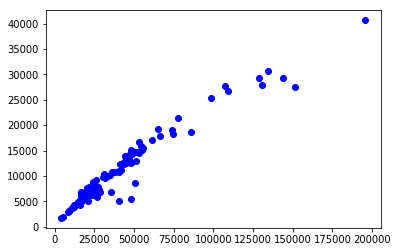

In [56]:
import matplotlib.pyplot as plt
plt.plot(stats.length, stats.unique, "bo") #Graficamos columnas especificas de stats

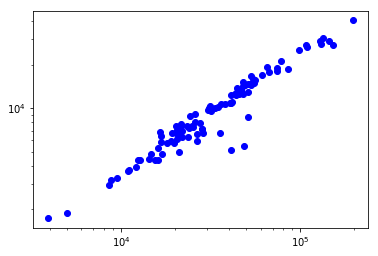

In [57]:
import matplotlib.pyplot as plt
plt.loglog(stats.length, stats.unique, "bo")

In [58]:
stats[stats.language =="English"]

,language,author,title,length,unique
1,English,Shakespeare,Macbeth,16874,4780
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Othello,26590,5898
4,English,Shakespeare,Romeo and Juliet,40776,5118
5,English,Shakespeare,A Midsummer Night's Dream,16103,4345
6,English,Shakespeare,The Merchant of Venice,20949,4978
7,English,Shakespeare,Richard III,48315,5449


In [59]:
stats[stats.language =="French"]

,language,author,title,length,unique
8,French,De maupassant,La petite roque,40688,10890
9,French,De maupassant,La Main Gauche,33481,9983
10,French,De maupassant,Claire de Lune,25975,8076
11,French,De maupassant,L'inutile beautCÌ§,37840,10781
12,French,De maupassant,Åuvres compleÌtes de Guy de Maupassant,54772,15028
13,French,De maupassant,La Maison Tellier,43685,12305
14,French,De maupassant,Le Horla,41485,11091
15,French,De maupassant,Boule de Suif,35905,10725
16,French,De maupassant,Contes de la Becasse,34723,10210
17,French,Sand,Le poaÌme de Myrza,12771,4348


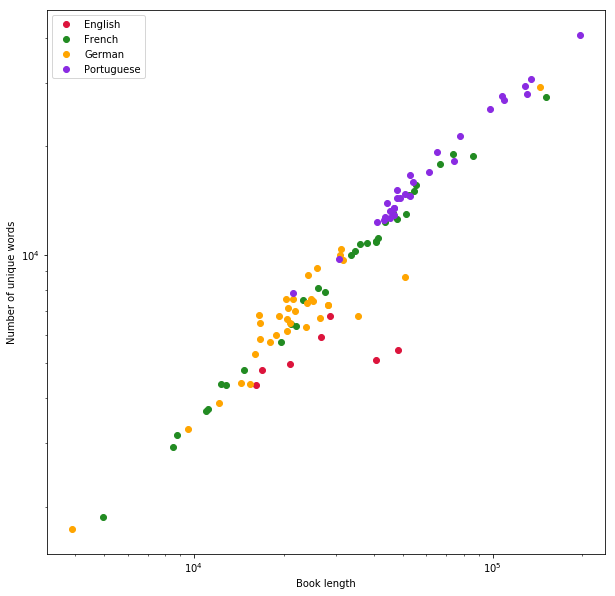

In [63]:
plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")
plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot.pdf")

In [65]:
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,Macbeth,16874,4780
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Othello,26590,5898
4,English,Shakespeare,Romeo and Juliet,40776,5118
5,English,Shakespeare,A Midsummer Night's Dream,16103,4345


In [66]:
stats["length"]

1       16874
2       28551
3       26590
4       40776
5       16103
6       20949
7       48315
8       40688
9       33481
10      25975
11      37840
12      54772
13      43685
14      41485
15      35905
16      34723
17      12771
18      12370
19      23210
20      19600
21       8748
22      14716
23      85756
24      27486
25      21089
26     151405
27      47831
28      10938
29       4980
30       8510
        ...  
73      16648
74      20600
75      25888
76      16651
77      24701
78      16032
79      17912
80      25106
81      18855
82      21802
83      21040
84       9535
85      12143
86      23863
87      28148
88      20484
89      28155
90      23660
91     143699
92      15443
93      31128
94       3919
95      21441
96      30929
97      35456
98      20450
99      50725
100     26482
101     24181
102     14349
Name: length, Length: 102, dtype: object